In [24]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

import re
from acquire import extract, build_extracted_df, get_new_patch_data, get_players
from prepare import prepare
from env import api_key

In [122]:
def reset_train():
    train = pd.read_csv('final10_train_scaled.csv')

    test = pd.read_csv('final10_test_scaled.csv')

    train = train.drop(columns=['Unnamed: 0'])
    test = test.drop(columns=['Unnamed: 0'])
    return train, test

In [120]:
train.shape, test.shape

((3890, 251), (973, 251))

In [121]:
train.head(3)

,winningTeam,BlueTeamAirDragon_scaled,BlueTopAssists_scaled,RedSupportAssists_scaled,BlueJungleAssists_scaled,BlueMidAssists_scaled,BlueADCAssists_scaled,BlueSupportAssists_scaled,RedTopAssists_scaled,RedJungleAssists_scaled,...,BlueSupportKda_scaled,RedTopKda_scaled,RedJungleKda_scaled,RedMidKda_scaled,RedBotKda_scaled,RedSupportKda_scaled,BlueTeamKdaDifference_scaled,BlueJungleGankHeavy_scaled,RedJungleGankHeavy_scaled,BlueTeamJungleDiffy_scaled
0,200.0,0.0,0.111111,0.000000,0.125,0.125,0.500,0.166667,0.090909,0.0,...,0.448718,0.389610,0.243243,0.323529,0.283951,0.314286,0.652542,0.298319,0.194764,0.551422
1,200.0,0.0,0.111111,0.000000,0.000,0.375,0.000,0.416667,0.000000,0.3,...,0.500000,0.350649,0.297297,0.470588,0.320988,0.285714,0.601695,0.298319,0.090052,0.606127
2,100.0,0.0,0.111111,0.090909,0.125,0.000,0.125,0.166667,0.090909,0.1,...,0.500000,0.350649,0.229730,0.250000,0.259259,0.328571,0.686441,0.126050,0.140314,0.490153


kills, xp, deaths, assissts

combine that with dragons, towers, inhibs

BlueTopAssists_scaled
BlueJungleAssists_scaled
BlueMidAssists_scaled
BlueADCAssists_scaled
BlueSupportAssists_scaled
BlueTeamInhibsLost_scaled
BlueTeamRiftHeralds_scaled
BlueTeamTowersLost_scaled
BlueTopCurrentGold_scaled
BlueJungleCurrentGold_scaled
BlueMidCurrentGold_scaled
BlueADCCurrentGold_scaled
BlueSupportCurrentGold_scaled
BlueTopDeaths_scaled
BlueJungleDeaths_scaled
BlueMidDeaths_scaled
BlueADCDeaths_scaled
BlueSupportDeaths_scaled
BlueTeamDragons_scaled
BlueTeamEarthDragon_scaled
BlueTeamFireDragon_scaled
BlueTeamHextechDragon_scaled
BlueTeamWaterDragon_scaled
BlueTeamChemtechDragon_scaled
BlueTeamAirDragon_scaled
BlueTopgoldPerSecond_scaled
BlueJunglegoldPerSecond_scaled
BlueMidgoldPerSecond_scaled
BlueADCgoldPerSecond_scaled
BlueSupportgoldPerSecond_scaled
BlueTopJungleMinionsKilled_scaled
BlueJungleJungleMinionsKilled_scaled
BlueMidJungleMinionsKilled_scaled
BlueADCJungleMinionsKilled_scaled
BlueSupportJungleMinionsKilled_scaled
BlueTopKills_scaled
BlueJungleKills_scaled
BlueMidKills_scaled
BlueADCKills_scaled
BlueSupportKills_scaled
BlueTopLevel_scaled
BlueJungleLevel_scaled
BlueMidLevel_scaled
BlueADCLevel_scaled
BlueSupportLevel_scaled
BlueTopMagicDamageDoneToChampions_scaled
BlueJungleMagicDamageDoneToChampions_scaled
BlueMidMagicDamageDoneToChampions_scaled
BlueADCMagicDamageDoneToChampions_scaled
BlueSupportMagicDamageDoneToChampions_scaled
BlueTopMinionsKilled_scaled
BlueJungleMinionsKilled_scaled
BlueMidMinionsKilled_scaled
BlueADCMinionsKilled_scaled
BlueSupportMinionsKilled_scaled
BlueTopPhysicalDamageDoneToChampions_scaled
BlueJunglePhysicalDamageDoneToChampions_scaled
BlueMidPhysicalDamageDoneToChampions_scaled
BlueADCPhysicalDamageDoneToChampions_scaled
BlueSupportPhysicalDamageDoneToChampions_scaled
BlueTopTimeEnemySpentControlled_scaled
BlueJungleTimeEnemySpentControlled_scaled
BlueMidTimeEnemySpentControlled_scaled
BlueADCTimeEnemySpentControlled_scaled
BlueSupportTimeEnemySpentControlled_scaled
BlueTopTotalDamageDoneToChampions_scaled
BlueJungleTotalDamageDoneToChampions_scaled
BlueMidTotalDamageDoneToChampions_scaled
BlueADCTotalDamageDoneToChampions_scaled
BlueSupportTotalDamageDoneToChampions_scaled
BlueTopTotalGold_scaled
BlueJungleTotalGold_scaled
BlueMidTotalGold_scaled
BlueADCTotalGold_scaled
BlueSupportTotalGold_scaled
BlueTopTrueDamageDoneToChampions_scaled
BlueJungleTrueDamageDoneToChampions_scaled
BlueMidTrueDamageDoneToChampions_scaled
BlueADCTrueDamageDoneToChampions_scaled
BlueSupportTrueDamageDoneToChampions_scaled
BlueTopWard_scaled
BlueJungleWard_scaled
BlueMidWard_scaled
BlueADCWard_scaled
BlueSupportWard_scaled
BlueTopXp_scaled
BlueJungleXp_scaled
BlueMidXp_scaled
BlueADCXp_scaled
BlueSupportXp_scaled

RedTopAssists_scaled
RedJungleAssists_scaled
RedMidAssists_scaled
RedADCAssists_scaled
RedSupportAssists_scaled
RedTeamInhibsLost_scaled
RedTeamRiftHeralds_scaled
RedTeamTowersLost_scaled
RedTopCurrentGold_scaled
RedJungleCurrentGold_scaled
RedMidCurrentGold_scaled
RedADCCurrentGold_scaled
RedSupportCurrentGold_scaled
RedTopDeaths_scaled
RedJungleDeaths_scaled
RedMidDeaths_scaled
RedADCDeaths_scaled
RedSupportDeaths_scaled
RedTeamDragons_scaled
RedTeamEarthDragon_scaled
RedTeamFireDragon_scaled
RedTeamHextechDragon_scaled
RedTeamWaterDragon_scaled
RedTeamChemtechDragon_scaled
RedTeamAirDragon_scaled
RedTopgoldPerSecond_scaled
RedJunglegoldPerSecond_scaled
RedMidgoldPerSecond_scaled
RedADCgoldPerSecond_scaled
RedSupportgoldPerSecond_scaled
RedTopJungleMinionsKilled_scaled
RedJungleJungleMinionsKilled_scaled
RedMidJungleMinionsKilled_scaled
RedADCJungleMinionsKilled_scaled
RedSupportJungleMinionsKilled_scaled
RedTopKills_scaled
RedJungleKills_scaled
RedMidKills_scaled
RedADCKills_scaled
RedSupportKills_scaled
RedTopLevel_scaled
RedJungleLevel_scaled
RedMidLevel_scaled
RedADCLevel_scaled
RedSupportLevel_scaled
RedTopMagicDamageDoneToChampions_scaled
RedJungleMagicDamageDoneToChampions_scaled
RedMidMagicDamageDoneToChampions_scaled
RedADCMagicDamageDoneToChampions_scaled
RedSupportMagicDamageDoneToChampions_scaled
RedTopMinionsKilled_scaled
RedJungleMinionsKilled_scaled
RedMidMinionsKilled_scaled
RedADCMinionsKilled_scaled
RedSupportMinionsKilled_scaled
RedTopPhysicalDamageDoneToChampions_scaled
RedJunglePhysicalDamageDoneToChampions_scaled
RedMidPhysicalDamageDoneToChampions_scaled
RedADCPhysicalDamageDoneToChampions_scaled
RedSupportPhysicalDamageDoneToChampions_scaled
RedTopTimeEnemySpentControlled_scaled
RedJungleTimeEnemySpentControlled_scaled
RedMidTimeEnemySpentControlled_scaled
RedADCTimeEnemySpentControlled_scaled
RedSupportTimeEnemySpentControlled_scaled
RedTopTotalDamageDoneToChampions_scaled
RedJungleTotalDamageDoneToChampions_scaled
RedMidTotalDamageDoneToChampions_scaled
RedADCTotalDamageDoneToChampions_scaled
RedSupportTotalDamageDoneToChampions_scaled
RedTopTotalGold_scaled
RedJungleTotalGold_scaled
RedMidTotalGold_scaled
RedADCTotalGold_scaled
RedSupportTotalGold_scaled
RedTopTrueDamageDoneToChampions_scaled
RedJungleTrueDamageDoneToChampions_scaled
RedMidTrueDamageDoneToChampions_scaled
RedADCTrueDamageDoneToChampions_scaled
RedSupportTrueDamageDoneToChampions_scaled
RedTopWard_scaled
RedJungleWard_scaled
RedMidWard_scaled
RedADCWard_scaled
RedSupportWard_scaled
RedTopXp_scaled
RedJungleXp_scaled
RedMidXp_scaled
RedADCXp_scaled
RedSupportXp_scaled


###########
winningTeam

RedTeamInhibsLost_scaled
BlueTeamInhibsLost_scaled

BlueTeamBarons_scaled
RedTeamBarons_scaled

BlueTeamRiftHeralds_scaled
RedTeamRiftHeralds_scaled

BlueTeamTowersLost_scaled
RedTeamTowersLost_scaled




# Assists
BlueTopAssists_scaled
RedSupportAssists_scaled
BlueJungleAssists_scaled
BlueMidAssists_scaled
BlueADCAssists_scaled
BlueSupportAssists_scaled
RedTopAssists_scaled
RedJungleAssists_scaled
RedMidAssists_scaled
RedADCAssists_scaled



# Current Gold
BlueTopCurrentGold_scaled
RedSupportCurrentGold_scaled
BlueJungleCurrentGold_scaled
BlueMidCurrentGold_scaled
BlueADCCurrentGold_scaled
BlueSupportCurrentGold_scaled
RedTopCurrentGold_scaled
RedJungleCurrentGold_scaled
RedMidCurrentGold_scaled
RedADCCurrentGold_scaled

# Deaths

BlueTopDeaths_scaled
RedSupportDeaths_scaled
BlueJungleDeaths_scaled
BlueMidDeaths_scaled
BlueADCDeaths_scaled
BlueSupportDeaths_scaled
RedTopDeaths_scaled
RedJungleDeaths_scaled
RedMidDeaths_scaled
RedADCDeaths_scaled

# Dragons

BlueTeamDragons_scaled
RedTeamDragons_scaled

# individual Dragons
BlueTeamEarthDragon_scaled
RedTeamEarthDragon_scaled

BlueTeamFireDragon_scaled
RedTeamFireDragon_scaled

BlueTeamHextechDragon_scaled
RedTeamHextechDragon_scaled

BlueTeamWaterDragon_scaled
RedTeamWaterDragon_scaled

BlueTeamChemtechDragon_scaled
RedTeamChemtechDragon_scaled

BlueTeamAirDragon_scaled
RedTeamAirDragon_scaled


# Gold Per Sec

BlueTopgoldPerSecond_scaled
RedSupportgoldPerSecond_scaled
BlueJunglegoldPerSecond_scaled
BlueMidgoldPerSecond_scaled
BlueADCgoldPerSecond_scaled
BlueSupportgoldPerSecond_scaled
RedTopgoldPerSecond_scaled
RedJunglegoldPerSecond_scaled
RedMidgoldPerSecond_scaled
RedADCgoldPerSecond_scaled


# Jungle Minionskilled

BlueTopJungleMinionsKilled_scaled
RedSupportJungleMinionsKilled_scaled
BlueJungleJungleMinionsKilled_scaled
BlueMidJungleMinionsKilled_scaled
BlueADCJungleMinionsKilled_scaled
BlueSupportJungleMinionsKilled_scaled
RedTopJungleMinionsKilled_scaled
RedJungleJungleMinionsKilled_scaled
RedMidJungleMinionsKilled_scaled
RedADCJungleMinionsKilled_scaled

# Kills
BlueTopKills_scaled
RedSupportKills_scaled
BlueJungleKills_scaled
BlueMidKills_scaled
BlueADCKills_scaled
BlueSupportKills_scaled
RedTopKills_scaled
RedJungleKills_scaled
RedMidKills_scaled
RedADCKills_scaled

# Level
BlueTopLevel_scaled
RedSupportLevel_scaled
BlueJungleLevel_scaled
BlueMidLevel_scaled
BlueADCLevel_scaled
BlueSupportLevel_scaled
RedTopLevel_scaled
RedJungleLevel_scaled
RedMidLevel_scaled
RedADCLevel_scaled

# Magic Damage
BlueTopMagicDamageDoneToChampions_scaled
RedSupportMagicDamageDoneToChampions_scaled
BlueJungleMagicDamageDoneToChampions_scaled
BlueMidMagicDamageDoneToChampions_scaled
BlueADCMagicDamageDoneToChampions_scaled
BlueSupportMagicDamageDoneToChampions_scaled
RedTopMagicDamageDoneToChampions_scaled
RedJungleMagicDamageDoneToChampions_scaled
RedMidMagicDamageDoneToChampions_scaled
RedADCMagicDamageDoneToChampions_scaled

# Minions killed CS
BlueTopMinionsKilled_scaled
RedSupportMinionsKilled_scaled
BlueJungleMinionsKilled_scaled
BlueMidMinionsKilled_scaled
BlueADCMinionsKilled_scaled
BlueSupportMinionsKilled_scaled
RedTopMinionsKilled_scaled
RedJungleMinionsKilled_scaled
RedMidMinionsKilled_scaled
RedADCMinionsKilled_scaled

# Physical Damage
BlueTopPhysicalDamageDoneToChampions_scaled
RedSupportPhysicalDamageDoneToChampions_scaled
BlueJunglePhysicalDamageDoneToChampions_scaled
BlueMidPhysicalDamageDoneToChampions_scaled
BlueADCPhysicalDamageDoneToChampions_scaled
BlueSupportPhysicalDamageDoneToChampions_scaled
RedTopPhysicalDamageDoneToChampions_scaled
RedJunglePhysicalDamageDoneToChampions_scaled
RedMidPhysicalDamageDoneToChampions_scaled
RedADCPhysicalDamageDoneToChampions_scaled

# CC
BlueTopTimeEnemySpentControlled_scaled
RedSupportTimeEnemySpentControlled_scaled
BlueJungleTimeEnemySpentControlled_scaled
BlueMidTimeEnemySpentControlled_scaled
BlueADCTimeEnemySpentControlled_scaled
BlueSupportTimeEnemySpentControlled_scaled
RedTopTimeEnemySpentControlled_scaled
RedJungleTimeEnemySpentControlled_scaled
RedMidTimeEnemySpentControlled_scaled
RedADCTimeEnemySpentControlled_scaled

# Total Damage
BlueTopTotalDamageDoneToChampions_scaled
RedSupportTotalDamageDoneToChampions_scaled
BlueJungleTotalDamageDoneToChampions_scaled
BlueMidTotalDamageDoneToChampions_scaled
BlueADCTotalDamageDoneToChampions_scaled
BlueSupportTotalDamageDoneToChampions_scaled
RedTopTotalDamageDoneToChampions_scaled
RedJungleTotalDamageDoneToChampions_scaled
RedMidTotalDamageDoneToChampions_scaled
RedADCTotalDamageDoneToChampions_scaled

# total Gold
BlueTopTotalGold_scaled
RedSupportTotalGold_scaled
BlueJungleTotalGold_scaled
BlueMidTotalGold_scaled
BlueADCTotalGold_scaled
BlueSupportTotalGold_scaled
RedTopTotalGold_scaled
RedJungleTotalGold_scaled
RedMidTotalGold_scaled
RedADCTotalGold_scaled


# True Damage
BlueTopTrueDamageDoneToChampions_scaled
RedSupportTrueDamageDoneToChampions_scaled
BlueJungleTrueDamageDoneToChampions_scaled
BlueMidTrueDamageDoneToChampions_scaled
BlueADCTrueDamageDoneToChampions_scaled
BlueSupportTrueDamageDoneToChampions_scaled
RedTopTrueDamageDoneToChampions_scaled
RedJungleTrueDamageDoneToChampions_scaled
RedMidTrueDamageDoneToChampions_scaled
RedADCTrueDamageDoneToChampions_scaled

# Wards
BlueTopWard_scaled
RedSupportWard_scaled
BlueJungleWard_scaled
BlueMidWard_scaled
BlueADCWard_scaled
BlueSupportWard_scaled
RedTopWard_scaled
RedJungleWard_scaled
RedMidWard_scaled
RedADCWard_scaled


# XP
BlueTopXp_scaled
RedSupportXp_scaled
BlueJungleXp_scaled
BlueMidXp_scaled
BlueADCXp_scaled
BlueSupportXp_scaled
RedTopXp_scaled
RedJungleXp_scaled
RedMidXp_scaled
RedADCXp_scaled

# Team Stats


BlueTeamDeaths_scaled
RedTeamDeaths_scaled

BlueTeamGoldPerSec_scaled
RedTeamGoldPerSec_scaled

BlueTeamJungleMinionsKilled_scaled
RedTeamJungleMinionsKilled_scaled

BlueTeamKills_scaled
RedTeamKills_scaled

BlueTeamLevel_scaled
RedTeamLevel_scaled

BlueTeamMagicDamageDoneToChampions_scaled
RedTeamMagicDamageDoneToChampions_scaled

BlueTeamMinionsKilled_scaled
RedTeamMinionsKilled_scaled

BlueTeamPhysicalDamageDoneToChampions_scaled
RedTeamPhysicalDamageDoneToChampions_scaled

BlueTeamTimeEnemySpentControlled_scaled
RedTeamTimeEnemySpentControlled_scaled

BlueTeamTotalDamageDoneToChampions_scaled
RedTeamTotalDamageDoneToChampions_scaled

BlueTeamTotalGold_scaled
RedTeamTotalGold_scaled

BlueTeamTrueDamageDoneToChampions_scaled
RedTeamTrueDamageDoneToChampions_scaled

BlueTeamWards_scaled
RedTeamWards_scaled

BlueTeamAssists_scaled
RedTeamAssists_scaled

BlueTeamXp_scaled
RedTeamXp_scaled

BlueTeamTotalGoldDifference_scaled
RedTeamTotalGoldDifference_scaled

# Difference

BlueTeamLevelDifference_scaled
BlueTeamXpDifference_scaled
BlueTeamWardDifference_scaled
BlueTeamminionKillDifference_scaled
BlueTeamDeathsDifference_scaled
BlueTeamMagicDmgDifference_scaled
BlueTeamPhysicalDmgDifference_scaled
BlueTeamTrueDmgDifference_scaled
BlueTeamTotalDmgDifference_scaled
BlueTeamTotalMinionsMonstersDifference_scaled
BlueTeamTimeCCingDifference_scaled
BlueteamWardDifference_scaled
BlueteamAssistDifference_scaled
BlueBotLaneKillDifference_scaled
BlueJungTopkillDifference_scaled
BlueTeamWaterDragonDifference_scaled
BlueTeamAirDragonDifference_scaled
BlueTeamChemtechDragonDifference_scaled
BlueTeamFireDragonDifference_scaled
BlueTeamHextechDragonDifference_scaled
BlueTeamEarthDragonDifference_scaled

# KDA
BlueSupportStats_scaled
RedSupportStats_scaled
BlueSupportDifference_scaled
BlueTopKda_scaled
BlueJungleKda_scaled
BlueMidKda_scaled
BlueBotKda_scaled
BlueSupportKda_scaled
RedTopKda_scaled
RedJungleKda_scaled
RedMidKda_scaled
RedBotKda_scaled
RedSupportKda_scaled
BlueTeamKdaDifference_scaled
BlueJungleGankHeavy_scaled
BlueTeamJungleDiffy_scaled
RedJungleGankHeavy_scaled

In [22]:
# Clustering X only contains KDA

In [47]:
features=[
'BlueTopAssists_scaled',
'RedSupportAssists_scaled',
'BlueJungleAssists_scaled',
'BlueMidAssists_scaled',
'BlueADCAssists_scaled',
'BlueSupportAssists_scaled',
'RedTopAssists_scaled',
'RedJungleAssists_scaled',
'RedMidAssists_scaled',
'RedADCAssists_scaled',
'BlueTopDeaths_scaled',
'RedSupportDeaths_scaled',
'BlueJungleDeaths_scaled',
'BlueMidDeaths_scaled',
'BlueADCDeaths_scaled',
'BlueSupportDeaths_scaled',
'RedTopDeaths_scaled',
'RedJungleDeaths_scaled',
'RedMidDeaths_scaled',
'RedADCDeaths_scaled',
'BlueTopKills_scaled',
'RedSupportKills_scaled',
'BlueJungleKills_scaled',
'BlueMidKills_scaled',
'BlueADCKills_scaled',
'BlueSupportKills_scaled',
'RedTopKills_scaled',
'RedJungleKills_scaled',
'RedMidKills_scaled',
'RedADCKills_scaled']

In [48]:
X = train[features]

In [49]:
X

,BlueTopAssists_scaled,RedSupportAssists_scaled,BlueJungleAssists_scaled,BlueMidAssists_scaled,BlueADCAssists_scaled,BlueSupportAssists_scaled,RedTopAssists_scaled,RedJungleAssists_scaled,RedMidAssists_scaled,RedADCAssists_scaled,...,BlueTopKills_scaled,RedSupportKills_scaled,BlueJungleKills_scaled,BlueMidKills_scaled,BlueADCKills_scaled,BlueSupportKills_scaled,RedTopKills_scaled,RedJungleKills_scaled,RedMidKills_scaled,RedADCKills_scaled
0,0.111111,0.000000,0.125,0.125,0.500,0.166667,0.090909,0.0,0.000000,0.125,...,0.222222,0.250,0.222222,0.2,0.071429,0.111111,0.0,0.111111,0.111111,0.000000
1,0.111111,0.000000,0.000,0.375,0.000,0.416667,0.000000,0.3,0.000000,0.250,...,0.111111,0.000,0.222222,0.0,0.214286,0.000000,0.0,0.000000,0.333333,0.000000
2,0.111111,0.090909,0.125,0.000,0.125,0.166667,0.090909,0.1,0.000000,0.000,...,0.444444,0.000,0.111111,0.1,0.214286,0.111111,0.1,0.111111,0.000000,0.090909
3,0.111111,0.545455,0.375,0.125,0.000,0.333333,0.090909,0.0,0.000000,0.500,...,0.222222,0.125,0.333333,0.2,0.357143,0.000000,0.0,0.111111,0.444444,0.272727
4,0.111111,0.181818,0.250,0.250,0.375,0.166667,0.000000,0.2,0.142857,0.250,...,0.444444,0.250,0.222222,0.1,0.071429,0.333333,0.2,0.111111,0.111111,0.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,0.333333,0.181818,0.125,0.000,0.125,0.416667,0.000000,0.2,0.142857,0.250,...,0.111111,0.125,0.333333,0.5,0.285714,0.111111,0.1,0.111111,0.222222,0.090909
3886,0.222222,0.454545,0.125,0.000,0.125,0.083333,0.000000,0.6,0.285714,0.000,...,0.000000,0.375,0.222222,0.0,0.071429,0.111111,0.1,0.000000,0.444444,0.272727
3887,0.222222,0.181818,0.250,0.000,0.250,0.166667,0.363636,0.0,0.285714,0.125,...,0.000000,0.000,0.444444,0.4,0.000000,0.000000,0.1,0.666667,0.000000,0.090909
3888,0.000000,0.000000,0.125,0.000,0.250,0.250000,0.000000,0.1,0.000000,0.250,...,0.000000,0.000,0.111111,0.0,0.142857,0.111111,0.1,0.333333,0.000000,0.000000


In [44]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state=1349)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [45]:
# make a new column names cluster in iris and X_scaled dataframe
df = pd.DataFrame()
df['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)

<ipython-input-45-be9dfcb39985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.predict(X)


In [46]:
X['cluster'].value_counts()

2    2129
1     882
0     879
Name: cluster, dtype: int64

In [42]:
kmeans.inertia_

2440.785121572345

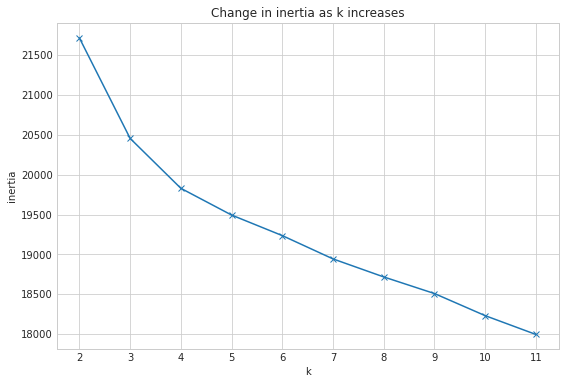

In [43]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_train).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [65]:
def create_clusters(features, train):
    '''
    Where X are the features and train is Well...Train
    '''
    # Creating X passing in the desired features
    X = train[features]

    #define the thing
    kmeans = KMeans(n_clusters=3, random_state=1349)

    # fit the thing
    kmeans.fit(X)

    # Use (predict using) the thing 
    kmeans.predict(X)
    
    # make a new column names cluster in iris and X_scaled dataframe
    df = pd.DataFrame()
    df['cluster'] = kmeans.predict(X)

    X['cluster'] = kmeans.predict(X)
    print(X.cluster.value_counts())
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(9, 6))
        pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
        plt.xticks(range(2, 12))
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title('Change in inertia as k increases')
        
   
    return df

<ipython-input-51-30e7d92e147e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.predict(X)


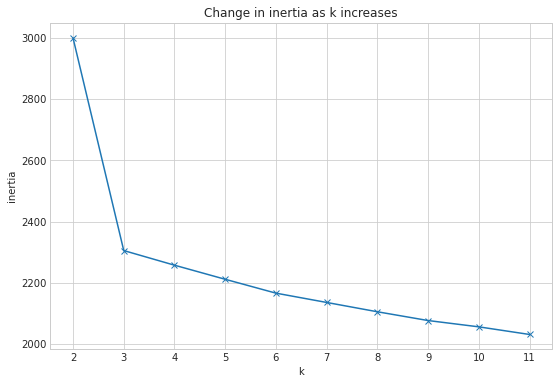

In [66]:
df = create_cluster(features, train)

In [67]:
X.cluster.value_counts()

2    1716
0    1138
1    1036
Name: cluster, dtype: int64

In [72]:
train

,winningTeam,BlueTeamAirDragon_scaled,BlueTopAssists_scaled,RedSupportAssists_scaled,BlueJungleAssists_scaled,BlueMidAssists_scaled,BlueADCAssists_scaled,BlueSupportAssists_scaled,RedTopAssists_scaled,RedJungleAssists_scaled,...,RedSupportKills_scaled,BlueJungleKills_scaled,BlueMidKills_scaled,BlueADCKills_scaled,BlueSupportKills_scaled,RedTopKills_scaled,RedJungleKills_scaled,RedMidKills_scaled,RedADCKills_scaled,cluster
0,200.0,0.0,0.111111,0.000000,0.125,0.125,0.500,0.166667,0.090909,0.0,...,0.250,0.222222,0.2,0.071429,0.111111,0.0,0.111111,0.111111,0.000000,0
1,200.0,0.0,0.111111,0.000000,0.000,0.375,0.000,0.416667,0.000000,0.3,...,0.000,0.222222,0.0,0.214286,0.000000,0.0,0.000000,0.333333,0.000000,2
2,100.0,0.0,0.111111,0.090909,0.125,0.000,0.125,0.166667,0.090909,0.1,...,0.000,0.111111,0.1,0.214286,0.111111,0.1,0.111111,0.000000,0.090909,2
3,200.0,0.0,0.111111,0.545455,0.375,0.125,0.000,0.333333,0.090909,0.0,...,0.125,0.333333,0.2,0.357143,0.000000,0.0,0.111111,0.444444,0.272727,1
4,100.0,0.0,0.111111,0.181818,0.250,0.250,0.375,0.166667,0.000000,0.2,...,0.250,0.222222,0.1,0.071429,0.333333,0.2,0.111111,0.111111,0.272727,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,200.0,0.0,0.333333,0.181818,0.125,0.000,0.125,0.416667,0.000000,0.2,...,0.125,0.333333,0.5,0.285714,0.111111,0.1,0.111111,0.222222,0.090909,0
3886,200.0,0.0,0.222222,0.454545,0.125,0.000,0.125,0.083333,0.000000,0.6,...,0.375,0.222222,0.0,0.071429,0.111111,0.1,0.000000,0.444444,0.272727,1
3887,100.0,0.0,0.222222,0.181818,0.250,0.000,0.250,0.166667,0.363636,0.0,...,0.000,0.444444,0.4,0.000000,0.000000,0.1,0.666667,0.000000,0.090909,0
3888,100.0,0.0,0.000000,0.000000,0.125,0.000,0.250,0.250000,0.000000,0.1,...,0.000,0.111111,0.0,0.142857,0.111111,0.1,0.333333,0.000000,0.000000,2


In [77]:
train = pd.concat([train, df], axis = 1)
boolean_dummy = pd.get_dummies(train['cluster'], drop_first=False)
train = pd.concat([train, boolean_dummy], axis = 1)

In [79]:
train = train.rename(columns = {
            0:'kda_cluster_0', 
            1:'kda_cluster_1',
            2:'kda_cluster_2'})

In [80]:
train

,winningTeam,BlueTeamAirDragon_scaled,BlueTopAssists_scaled,RedSupportAssists_scaled,BlueJungleAssists_scaled,BlueMidAssists_scaled,BlueADCAssists_scaled,BlueSupportAssists_scaled,RedTopAssists_scaled,RedJungleAssists_scaled,...,BlueADCKills_scaled,BlueSupportKills_scaled,RedTopKills_scaled,RedJungleKills_scaled,RedMidKills_scaled,RedADCKills_scaled,cluster,kda_cluster_0,kda_cluster_1,kda_cluster_2
0,200.0,0.0,0.111111,0.000000,0.125,0.125,0.500,0.166667,0.090909,0.0,...,0.071429,0.111111,0.0,0.111111,0.111111,0.000000,0,1,0,0
1,200.0,0.0,0.111111,0.000000,0.000,0.375,0.000,0.416667,0.000000,0.3,...,0.214286,0.000000,0.0,0.000000,0.333333,0.000000,2,0,0,1
2,100.0,0.0,0.111111,0.090909,0.125,0.000,0.125,0.166667,0.090909,0.1,...,0.214286,0.111111,0.1,0.111111,0.000000,0.090909,2,0,0,1
3,200.0,0.0,0.111111,0.545455,0.375,0.125,0.000,0.333333,0.090909,0.0,...,0.357143,0.000000,0.0,0.111111,0.444444,0.272727,1,0,1,0
4,100.0,0.0,0.111111,0.181818,0.250,0.250,0.375,0.166667,0.000000,0.2,...,0.071429,0.333333,0.2,0.111111,0.111111,0.272727,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,200.0,0.0,0.333333,0.181818,0.125,0.000,0.125,0.416667,0.000000,0.2,...,0.285714,0.111111,0.1,0.111111,0.222222,0.090909,0,1,0,0
3886,200.0,0.0,0.222222,0.454545,0.125,0.000,0.125,0.083333,0.000000,0.6,...,0.071429,0.111111,0.1,0.000000,0.444444,0.272727,1,0,1,0
3887,100.0,0.0,0.222222,0.181818,0.250,0.000,0.250,0.166667,0.363636,0.0,...,0.000000,0.000000,0.1,0.666667,0.000000,0.090909,0,1,0,0
3888,100.0,0.0,0.000000,0.000000,0.125,0.000,0.250,0.250000,0.000000,0.1,...,0.142857,0.111111,0.1,0.333333,0.000000,0.000000,2,0,0,1


In [81]:
# After this try adding red team stats too

In [98]:
X_train = train[['BlueTeamDragons_scaled',
                 'BlueTeamTowersLost_scaled',
                 'BlueTeamRiftHeralds_scaled',
                 'kda_cluster_0',
                 'kda_cluster_1',
                 'kda_cluster_2',
                 'RedTeamDragons_scaled',
                 'RedTeamTowersLost_scaled',
                 'RedTeamRiftHeralds_scaled']]

In [99]:
y_train = train.winningTeam

In [115]:
for leaf in range(1, 10):
    for depth in range(1,10):
        rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=leaf,
                            n_estimators=100,
                            max_depth=depth, 
                            random_state=123)
        results = cross_val_score(rf, X_train, y_train, cv=3)

# New Clusters with difference

In [123]:
train, test = reset_train()

In [125]:
features = [
'BlueTeamLevelDifference_scaled',
'BlueTeamXpDifference_scaled',
'BlueTeamWardDifference_scaled',
'BlueTeamminionKillDifference_scaled',
'BlueTeamDeathsDifference_scaled',
'BlueTeamMagicDmgDifference_scaled',
'BlueTeamPhysicalDmgDifference_scaled',
'BlueTeamTrueDmgDifference_scaled',
'BlueTeamTotalDmgDifference_scaled',
'BlueTeamTotalMinionsMonstersDifference_scaled',
'BlueTeamTimeCCingDifference_scaled',
'BlueteamWardDifference_scaled',
'BlueteamAssistDifference_scaled',
'BlueBotLaneKillDifference_scaled',
'BlueJungTopkillDifference_scaled',
'BlueTeamWaterDragonDifference_scaled',
'BlueTeamAirDragonDifference_scaled',
'BlueTeamChemtechDragonDifference_scaled',
'BlueTeamFireDragonDifference_scaled',
'BlueTeamHextechDragonDifference_scaled',
'BlueTeamEarthDragonDifference_scaled']

<ipython-input-65-c87b31b6a272>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.predict(X)


0    1855
1    1795
2     240
Name: cluster, dtype: int64


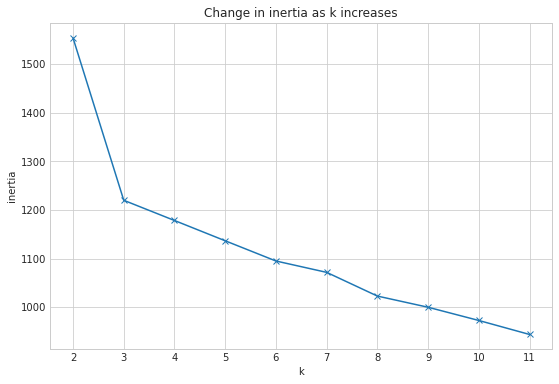

In [126]:
df = create_clusters(features, train)

In [127]:
train = pd.concat([train, df], axis = 1)
boolean_dummy = pd.get_dummies(train['cluster'], drop_first=False)
train = pd.concat([train, boolean_dummy], axis = 1)

In [128]:
train = train.rename(columns = {
            0:'diff_cluster_0', 
            1:'diff_cluster_1',
            2:'diff_cluster_2'})

In [137]:
X_train = train[['diff_cluster_0',
                 'diff_cluster_1',
                 'diff_cluster_2',
                 'BlueJungleGankHeavy_scaled',
                 'BlueTeamJungleDiffy_scaled']]

In [139]:
for leaf in range(1, 10):
    for depth in range(1,10):
        rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=leaf,
                            n_estimators=100,
                            max_depth=depth, 
                            random_state=123)
        results = cross_val_score(rf, X_train, y_train, cv=3)
        print(round(results.mean(), 2), depth, leaf)

# Something Random

In [142]:
train, test = reset_train()

In [141]:
features = ['BlueSupportAssists_scaled',
'BlueTeamDragons_scaled',
'BlueJungleJungleMinionsKilled_scaled',
'BlueTopXp_scaled',
'BlueTeamRiftHeralds_scaled',
'BlueTeamTotalDamageDoneToChampions_scaled',
'BlueTeamTotalGoldDifference_scaled',
'BlueADCPhysicalDamageDoneToChampions_scaled']

<ipython-input-65-c87b31b6a272>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.predict(X)


1    2229
2    1167
0     494
Name: cluster, dtype: int64


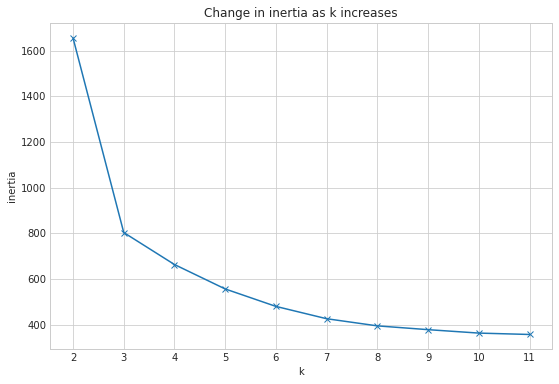

In [143]:
df = create_clusters(features, train)

In [144]:
train = pd.concat([train, df], axis = 1)
boolean_dummy = pd.get_dummies(train['cluster'], drop_first=False)
train = pd.concat([train, boolean_dummy], axis = 1)

In [145]:
train = train.rename(columns = {
            0:'random_cluster_0', 
            1:'random_cluster_1',
            2:'random_cluster_2'})

In [146]:
X_train = train[['random_cluster_0',
                 'random_cluster_1',
                 'random_cluster_2']]

In [ ]:
for leaf in range(1, 10):
    for depth in range(1,10):
        rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=leaf,
                            n_estimators=100,
                            max_depth=depth, 
                            random_state=123)
        results = cross_val_score(rf, X_train, y_train, cv=3)
        print(round(results.mean(), 2), depth, leaf)
        print(rf.feature_importances_)

# Blue team stats only for clustering


In [233]:
features = ['BlueTopAssists_scaled',
'BlueJungleAssists_scaled',
'BlueMidAssists_scaled',
'BlueADCAssists_scaled',
'BlueSupportAssists_scaled',
'BlueTeamRiftHeralds_scaled',
'BlueTeamTowersLost_scaled',
'BlueTopCurrentGold_scaled',
'BlueJungleCurrentGold_scaled',
'BlueMidCurrentGold_scaled',
'BlueADCCurrentGold_scaled',
'BlueSupportCurrentGold_scaled',
'BlueTopDeaths_scaled',
'BlueJungleDeaths_scaled',
'BlueMidDeaths_scaled',
'BlueADCDeaths_scaled',
'BlueSupportDeaths_scaled',
'BlueTeamDragons_scaled',
'BlueTeamEarthDragon_scaled',
'BlueTeamFireDragon_scaled',
'BlueTeamHextechDragon_scaled',
'BlueTeamWaterDragon_scaled',
'BlueTeamChemtechDragon_scaled',
'BlueTeamAirDragon_scaled',
'BlueTopgoldPerSecond_scaled',
'BlueJunglegoldPerSecond_scaled',
'BlueMidgoldPerSecond_scaled',
'BlueADCgoldPerSecond_scaled',
'BlueSupportgoldPerSecond_scaled',
'BlueTopJungleMinionsKilled_scaled',
'BlueJungleJungleMinionsKilled_scaled',
'BlueMidJungleMinionsKilled_scaled',
'BlueADCJungleMinionsKilled_scaled',
'BlueSupportJungleMinionsKilled_scaled',
'BlueTopKills_scaled',
'BlueJungleKills_scaled',
'BlueMidKills_scaled',
'BlueADCKills_scaled',
'BlueSupportKills_scaled',
'BlueTopLevel_scaled',
'BlueJungleLevel_scaled',
'BlueMidLevel_scaled',
'BlueADCLevel_scaled',
'BlueSupportLevel_scaled',
'BlueTopMagicDamageDoneToChampions_scaled',
'BlueJungleMagicDamageDoneToChampions_scaled',
'BlueMidMagicDamageDoneToChampions_scaled',
'BlueADCMagicDamageDoneToChampions_scaled',
'BlueSupportMagicDamageDoneToChampions_scaled',
'BlueTopMinionsKilled_scaled',
'BlueJungleMinionsKilled_scaled',
'BlueMidMinionsKilled_scaled',
'BlueADCMinionsKilled_scaled',
'BlueSupportMinionsKilled_scaled',
'BlueTopPhysicalDamageDoneToChampions_scaled',
'BlueJunglePhysicalDamageDoneToChampions_scaled',
'BlueMidPhysicalDamageDoneToChampions_scaled',
'BlueADCPhysicalDamageDoneToChampions_scaled',
'BlueSupportPhysicalDamageDoneToChampions_scaled',
'BlueTopTimeEnemySpentControlled_scaled',
'BlueJungleTimeEnemySpentControlled_scaled',
'BlueMidTimeEnemySpentControlled_scaled',
'BlueADCTimeEnemySpentControlled_scaled',
'BlueSupportTimeEnemySpentControlled_scaled',
'BlueTopTotalDamageDoneToChampions_scaled',
'BlueJungleTotalDamageDoneToChampions_scaled',
'BlueMidTotalDamageDoneToChampions_scaled',
'BlueADCTotalDamageDoneToChampions_scaled',
'BlueSupportTotalDamageDoneToChampions_scaled',
'BlueTopTotalGold_scaled',
'BlueJungleTotalGold_scaled',
'BlueMidTotalGold_scaled',
'BlueADCTotalGold_scaled',
'BlueSupportTotalGold_scaled',
'BlueTopTrueDamageDoneToChampions_scaled',
'BlueJungleTrueDamageDoneToChampions_scaled',
'BlueMidTrueDamageDoneToChampions_scaled',
'BlueADCTrueDamageDoneToChampions_scaled',
'BlueSupportTrueDamageDoneToChampions_scaled',
'BlueTopWard_scaled',
'BlueJungleWard_scaled',
'BlueMidWard_scaled',
'BlueADCWard_scaled',
'BlueSupportWard_scaled',
'BlueTopXp_scaled',
'BlueJungleXp_scaled',
'BlueMidXp_scaled',
'BlueADCXp_scaled',
'BlueSupportXp_scaled']

In [159]:
train, test = reset_train()

<ipython-input-65-c87b31b6a272>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.predict(X)


0    2093
1    1090
2     707
Name: cluster, dtype: int64


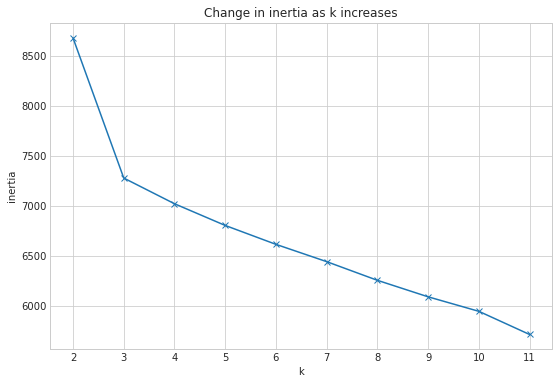

In [160]:
df = create_clusters(features, train)

In [161]:
train = pd.concat([train, df], axis = 1)
boolean_dummy = pd.get_dummies(train['cluster'], drop_first=False)
train = pd.concat([train, boolean_dummy], axis = 1)

train = train.rename(columns = {
            0:'onlyblue_cluster_0', 
            1:'onlyblue_cluster_1',
            2:'onlyblue_cluster_2'})

X_train = train[['onlyblue_cluster_0',
                 'onlyblue_cluster_1',
                 'onlyblue_cluster_2']]

In [194]:
for leaf in range(1, 10):
    for depth in range(1,10):
        rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=leaf,
                            n_estimators=100,
                            max_depth=depth, 
                            random_state=123)
        results = cross_val_score(rf, X_train, y_train, cv=3)
        print(round(results.mean(), 2), depth, leaf)

In [172]:
cluster0 = train[train.onlyblue_cluster_0==1]

In [173]:
cluster1 = train[train.onlyblue_cluster_1==1]

In [174]:
cluster2 = train[train.onlyblue_cluster_2==1]

# Cluster 0

In [234]:
X_train = cluster0.drop(columns=features)

In [235]:
X_train = cluster0.drop(columns='winningTeam')

In [236]:
y_train = cluster0.winningTeam

In [239]:
for leaf in range(5, 15):
    for depth in range(5,25):
        rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=leaf,
                            n_estimators=100,
                            max_depth=depth, 
                            random_state=123)
        #rf.fit(X_train, y_train)
        results = cross_val_score(rf, X_train, y_train, cv=3)
        print(round(results.mean(), 2), depth, leaf)

0.63 5 5
0.64 6 5
0.63 7 5
0.63 8 5
0.63 9 5
0.63 10 5
0.64 11 5
0.63 12 5
0.63 13 5
0.64 14 5
0.64 15 5
0.64 16 5


KeyboardInterrupt: 

In [238]:
best_features = pd.DataFrame(rf.feature_importances_, X_train.columns)
best_features.sort_values(by = 0, ascending = False).head(10)

,0
BlueTeamXpDifference_scaled,0.048973
BlueTeamTotalGoldDifference_scaled,0.043444
RedTeamTotalGoldDifference_scaled,0.035565
BlueTeamDeathsDifference_scaled,0.033635
BlueTeamTotalDmgDifference_scaled,0.030482
BlueTeamLevelDifference_scaled,0.027463
BlueTeamTotalMinionsMonstersDifference_scaled,0.024578
RedTeamXp_scaled,0.019764
BlueTeamKdaDifference_scaled,0.019582
RedTeamTotalGold_scaled,0.016182


In [213]:
# Cluster0 most import features
columns = ['RedTeamTotalGoldDifference_scaled',
'BlueTeamXpDifference_scaled',
'BlueTeamTotalMinionsMonstersDifference_scaled',
'BlueTeamTotalDmgDifference_scaled',
'BlueTeamTotalGoldDifference_scaled']

In [214]:
X_train = cluster0[columns]

In [215]:
y_train = cluster0['winningTeam']

In [216]:
for leaf in range(5, 15):
    for depth in range(5,25):
        rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=leaf,
                            n_estimators=100,
                            max_depth=depth, 
                            random_state=123)
        results = cross_val_score(rf, X_train, y_train, cv=3)
        print(round(results.mean(), 2), depth, leaf)

0.63 5 5
0.63 6 5
0.63 7 5
0.62 8 5
0.62 9 5
0.63 10 5
0.62 11 5
0.61 12 5
0.62 13 5
0.62 14 5
0.62 15 5
0.62 16 5
0.62 17 5
0.62 18 5
0.62 19 5
0.62 20 5
0.62 21 5
0.62 22 5
0.62 23 5
0.62 24 5
0.63 5 6
0.63 6 6
0.63 7 6
0.63 8 6
0.62 9 6
0.62 10 6
0.62 11 6
0.62 12 6
0.61 13 6
0.62 14 6
0.62 15 6
0.62 16 6
0.62 17 6
0.62 18 6
0.62 19 6
0.62 20 6
0.62 21 6
0.62 22 6
0.62 23 6
0.62 24 6
0.63 5 7
0.63 6 7
0.62 7 7
0.62 8 7
0.62 9 7
0.62 10 7
0.62 11 7
0.62 12 7
0.62 13 7
0.62 14 7
0.62 15 7
0.63 16 7
0.62 17 7
0.62 18 7
0.62 19 7
0.62 20 7
0.62 21 7
0.62 22 7
0.62 23 7
0.62 24 7
0.63 5 8
0.63 6 8
0.62 7 8
0.62 8 8
0.62 9 8
0.62 10 8
0.62 11 8
0.62 12 8
0.62 13 8
0.62 14 8
0.62 15 8
0.62 16 8
0.62 17 8
0.62 18 8
0.62 19 8
0.62 20 8
0.62 21 8
0.62 22 8
0.62 23 8
0.62 24 8
0.62 5 9
0.63 6 9
0.62 7 9
0.62 8 9
0.62 9 9
0.62 10 9
0.62 11 9
0.63 12 9
0.62 13 9
0.62 14 9
0.62 15 9
0.62 16 9
0.62 17 9
0.62 18 9
0.62 19 9
0.62 20 9
0.62 21 9
0.62 22 9
0.62 23 9
0.62 24 9
0.62 5 10
0.62 6 10
0.63 

# Cluster 1

In [223]:
# Cluster 1 top 5 best features
5/5
columns = ['RedTeamTotalGoldDifference_scaled',
'BlueTeamXpDifference_scaled',
'BlueTeamTotalMinionsMonstersDifference_scaled',
'BlueTeamTotalDmgDifference_scaled',
'BlueTeamTotalGoldDifference_scaled']

25/9
columns = ['RedTeamTotalGoldDifference_scaled',
'BlueTeamXpDifference_scaled',
'BlueTeamTotalMinionsMonstersDifference_scaled',
'BlueTeamTotalDmgDifference_scaled',
'BlueTeamTotalGoldDifference_scaled']

5/3
columns = ['BlueTeamXpDifference_scaled',
'RedTeamTotalGoldDifference_scaled',
'RedTeamTotalGold_scaled',
'BlueTeamTotalGoldDifference_scaled',
'BlueTeamDeathsDifference_scaled',
'BlueTeamKdaDifference_scaled',
'BlueTeamTotalMinionsMonstersDifference_scaled',
'BlueTeamTotalDmgDifference_scaled']

In [224]:
X_train = cluster1[columns]

y_train = cluster1.winningTeam


rf = RandomForestClassifier(bootstrap=True, 
                    class_weight=None, 
                    criterion='gini',
                    min_samples_leaf=9,
                    n_estimators=100,
                    max_depth=25, 
                    random_state=123)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))

0.7853211009174312


In [218]:
best_features = pd.DataFrame(rf.feature_importances_, X_train.columns)
best_features.sort_values(by = 0, ascending = False).head(10)

,0
RedTeamTotalGoldDifference_scaled,0.022220
BlueTeamXpDifference_scaled,0.020295
BlueTeamTotalMinionsMonstersDifference_scaled,0.020157
BlueTeamTotalDmgDifference_scaled,0.019875
BlueTeamTotalGoldDifference_scaled,0.017963
RedTeamTotalGold_scaled,0.014493
BlueTeamTotalGold_scaled,0.012509
RedTeamTotalDamageDoneToChampions_scaled,0.011251
BlueTopTotalGold_scaled,0.010597
BlueTeamTrueDmgDifference_scaled,0.010322


In [225]:
X_train = cluster2.drop(columns='winningTeam')

y_train = cluster2.winningTeam

for leaf in range(1, 25):
    for depth in range(1,25):
        rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=leaf,
                            n_estimators=100,
                            max_depth=depth, 
                            random_state=123)
        results = cross_val_score(rf, X_train, y_train, cv=3)
        print(round(results.mean(), 2), depth, leaf)

0.63 1 1
0.62 2 1
0.62 3 1
0.63 4 1
0.63 5 1
0.62 6 1
0.63 7 1
0.64 8 1
0.62 9 1
0.61 10 1
0.62 11 1
0.61 12 1
0.62 13 1
0.61 14 1
0.61 15 1
0.61 16 1
0.61 17 1
0.61 18 1
0.61 19 1
0.61 20 1
0.61 21 1
0.61 22 1
0.61 23 1
0.61 24 1
0.63 1 2
0.63 2 2
0.62 3 2
0.63 4 2
0.62 5 2
0.62 6 2
0.61 7 2
0.61 8 2
0.62 9 2
0.62 10 2
0.62 11 2
0.62 12 2
0.62 13 2
0.62 14 2
0.62 15 2
0.62 16 2
0.62 17 2
0.62 18 2
0.62 19 2
0.62 20 2
0.62 21 2
0.62 22 2
0.62 23 2
0.62 24 2
0.63 1 3
0.62 2 3
0.62 3 3
0.62 4 3
0.64 5 3
0.63 6 3
0.61 7 3
0.63 8 3
0.62 9 3
0.63 10 3
0.62 11 3
0.62 12 3
0.62 13 3
0.63 14 3
0.63 15 3
0.63 16 3
0.63 17 3
0.63 18 3
0.63 19 3
0.63 20 3
0.63 21 3
0.63 22 3
0.63 23 3
0.63 24 3
0.63 1 4
0.62 2 4
0.62 3 4
0.62 4 4
0.63 5 4
0.63 6 4
0.63 7 4
0.62 8 4
0.62 9 4
0.63 10 4
0.63 11 4
0.63 12 4
0.63 13 4
0.63 14 4
0.63 15 4
0.63 16 4
0.63 17 4
0.63 18 4
0.63 19 4
0.63 20 4
0.63 21 4
0.63 22 4
0.63 23 4
0.63 24 4
0.63 1 5
0.62 2 5
0.62 3 5
0.62 4 5
0.64 5 5
0.63 6 5
0.63 7 5
0.62 8 5
0.63

In [227]:
X_train = cluster2.drop(columns='winningTeam')

y_train = cluster2.winningTeam

rf = RandomForestClassifier(bootstrap=True, 
                    class_weight=None, 
                    criterion='gini',
                    min_samples_leaf=3,
                    n_estimators=100,
                    max_depth=5, 
                    random_state=123)
results = cross_val_score(rf, X_train, y_train, cv=3)
print(results.mean())
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))

0.6393376607765356
0.85997171145686


In [ ]:
best_features = pd.DataFrame(rf.feature_importances_, X_train.columns)
best_features.sort_values(by = 0, ascending = False).head(15)

In [ ]:
BlueTeamXpDifference_scaled
RedTeamTotalGoldDifference_scaled
RedTeamTotalGold_scaled
BlueTeamTotalGoldDifference_scaled
BlueTeamDeathsDifference_scaled
BlueTeamKdaDifference_scaled
BlueTeamTotalMinionsMonstersDifference_scaled
BlueTeamTotalDmgDifference_scaled

# Last Attempt 

In [231]:
columns = ['BlueTeamXpDifference_scaled',
'RedTeamTotalGoldDifference_scaled',
'RedTeamTotalGold_scaled',
'BlueTeamTotalGoldDifference_scaled',
'BlueTeamDeathsDifference_scaled',
'BlueTeamKdaDifference_scaled',
'BlueTeamTotalMinionsMonstersDifference_scaled',
'BlueTeamTotalDmgDifference_scaled',
'onlyblue_cluster_0',
'onlyblue_cluster_1',
'onlyblue_cluster_2']

In [240]:
X_train = train.drop(columns=features)
X_train = train.drop(columns=['winningTeam'])

y_train = train.winningTeam

In [241]:
X_train

,BlueTeamAirDragon_scaled,BlueTopAssists_scaled,RedSupportAssists_scaled,BlueJungleAssists_scaled,BlueMidAssists_scaled,BlueADCAssists_scaled,BlueSupportAssists_scaled,RedTopAssists_scaled,RedJungleAssists_scaled,RedMidAssists_scaled,...,RedBotKda_scaled,RedSupportKda_scaled,BlueTeamKdaDifference_scaled,BlueJungleGankHeavy_scaled,RedJungleGankHeavy_scaled,BlueTeamJungleDiffy_scaled,cluster,onlyblue_cluster_0,onlyblue_cluster_1,onlyblue_cluster_2
0,0.0,0.111111,0.000000,0.125,0.125,0.500,0.166667,0.090909,0.0,0.000000,...,0.283951,0.314286,0.652542,0.298319,0.194764,0.551422,1,0,1,0
1,0.0,0.111111,0.000000,0.000,0.375,0.000,0.416667,0.000000,0.3,0.000000,...,0.320988,0.285714,0.601695,0.298319,0.090052,0.606127,2,0,0,1
2,0.0,0.111111,0.090909,0.125,0.000,0.125,0.166667,0.090909,0.1,0.000000,...,0.259259,0.328571,0.686441,0.126050,0.140314,0.490153,1,0,1,0
3,0.0,0.111111,0.545455,0.375,0.125,0.000,0.333333,0.090909,0.0,0.000000,...,0.481481,0.500000,0.550847,0.348739,0.131937,0.610503,0,1,0,0
4,0.0,0.111111,0.181818,0.250,0.250,0.375,0.166667,0.000000,0.2,0.142857,...,0.555556,0.342857,0.567797,0.256303,0.141361,0.557440,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,0.0,0.333333,0.181818,0.125,0.000,0.125,0.416667,0.000000,0.2,0.142857,...,0.283951,0.385714,0.720339,0.352941,0.154974,0.600656,0,1,0,0
3886,0.0,0.222222,0.454545,0.125,0.000,0.125,0.083333,0.000000,0.6,0.285714,...,0.432099,0.714286,0.245763,0.252101,0.043979,0.606127,0,1,0,0
3887,0.0,0.222222,0.181818,0.250,0.000,0.250,0.166667,0.363636,0.0,0.285714,...,0.345679,0.371429,0.483051,0.449580,0.664921,0.384573,0,1,0,0
3888,0.0,0.000000,0.000000,0.125,0.000,0.250,0.250000,0.000000,0.1,0.000000,...,0.271605,0.228571,0.516949,0.126050,0.341361,0.385120,1,0,1,0


In [245]:
high = 0
highdepth = 0
highleaf = 0
for leaf in range(1, 25):
    for depth in range(1,25):
        rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=leaf,
                            n_estimators=100,
                            max_depth=depth, 
                            random_state=123)
        results = cross_val_score(rf, X_train, y_train, cv=3)
        if results.mean() > high:
            high = results.mean()
            highdepth = depth
            highleaf = leaf
            print(high, highdepth, highleaf)

0.6223649225341165 1 1
0.6262211624800504 2 1
0.6267339793318548 9 1
0.6293044093523833 7 2
0.6305894260576005 12 2
0.6316178360318684 19 2
0.6352204438225598 15 4
0.6365020893419763 21 6
0.6367590926830197 23 6
